### Group by groups together rows based on a column 
### Post GROUP By, we can perform aggregate functions like sum, avg etc

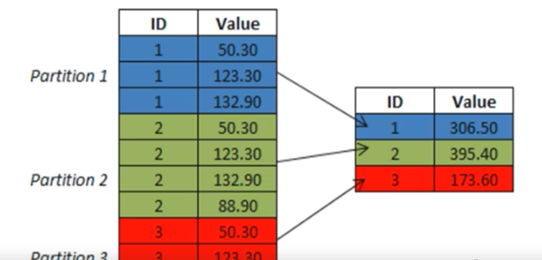

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales_data = {'Company':['GooG','GooG','MSFT','MSFT','FB','FB'],
              'Person' :['John Smith','Jane Doe','Amy','Andy','Charlie','Karla'],
              'Sales'  :[200,400,600,1000,1200,10000]}

In [4]:
### create a data frame using dictionary sales_data
sales_df = pd.DataFrame(data=sales_data)

In [5]:
sales_df

,Company,Person,Sales
0,GooG,John Smith,200
1,GooG,Jane Doe,400
2,MSFT,Amy,600
3,MSFT,Andy,1000
4,FB,Charlie,1200
5,FB,Karla,10000


In [7]:
#### using Group By Method. group by "company" column

grpbycomp = sales_df.groupby('Company')
grpbycomp
print(type(grpbycomp))

### note that the output is a group by object

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [8]:
### mean of sales by company or average sales for each company
grpbycomp.mean()

### for eg mean sales of facebook is (1200+10000)/2) = 5600 
### outputs a data frame with index called company and sales
### this allows us to further process the data


,Sales
Company,
FB,5600
GooG,300
MSFT,800


In [9]:
### to find total sales per company
grpbycomp.sum()

,Sales
Company,
FB,11200
GooG,600
MSFT,1600


In [10]:
#### to get the overall sales of facebook
grpbycomp.sum().loc['FB']

Sales    11200
Name: FB, dtype: int64

In [15]:
### smart coding 
res= df.groupby('Company').sum().loc['FB']
print(res)

Sales    11200
Name: FB, dtype: int64


In [16]:
### smart coding 
res= df.groupby('Company').sum().loc[['FB','GooG']]
print(res)

         Sales
Company       
FB       11200
GooG       600


In [13]:
#### to get the overall sales of Google
grpbycomp.sum().loc['GooG']


Sales    600
Name: GooG, dtype: int64

In [14]:
### smart coding 
df.groupby('Company').sum().loc['GooG']

Sales    600
Name: GooG, dtype: int64

In [12]:
### other ways of writing expression with groupby
#### groupby (column). aggregatefunction
df.groupby('Company').sum().loc['FB']

Sales    11200
Name: FB, dtype: int64

In [16]:
df.groupby('Company').sum().loc['GooG']

Sales    600
Name: GooG, dtype: int64

In [18]:
df

,Company,Person,Sales
0,GooG,John Smith,200
1,GooG,Jane Doe,400
2,MSFT,Amy,600
3,MSFT,Andy,1000
4,FB,Charlie,1200
5,FB,Karla,10000


In [19]:
### to count the number of persons in each company

df.groupby('Company').count()

,Person,Sales
Company,,
FB,2,2
GooG,2,2
MSFT,2,2


In [22]:
### count of rows in Sales column for every company
df.groupby('Company').count()['Sales']

Company
FB      2
GooG    2
MSFT    2
Name: Sales, dtype: int64

In [23]:
### Max Sales in every company

df.groupby('Company').max()

,Person,Sales
Company,,
FB,Karla,10000
GooG,John Smith,400
MSFT,Andy,1000


In [24]:
df.groupby('Company').min()

,Person,Sales
Company,,
FB,Charlie,1200
GooG,Jane Doe,200
MSFT,Amy,600


In [27]:
#### group by with describe method, gives min,max, mean , count, std deviation, \
### 1st quartile, 2nd quartile, 3rd quartile.
### All your summary statistics will be displayed by describe

df.groupby('Company').describe()

Sales                                                              
        count    mean          std     min     25%     50%     75%      max
Company                                                                    
FB        2.0  5600.0  6222.539674  1200.0  3400.0  5600.0  7800.0  10000.0
GooG      2.0   300.0   141.421356   200.0   250.0   300.0   350.0    400.0
MSFT      2.0   800.0   282.842712   600.0   700.0   800.0   900.0   1000.0

In [32]:
### describe on the whole data frame
df.describe()

,Sales
count,6.000000
mean,2233.333333
std,3822.913374
min,200.000000
25%,450.000000
50%,800.000000
75%,1150.000000
max,10000.000000


In [34]:
#### use transpose method on describe method output to transpose rows and columns
df.groupby('Company').describe().transpose()

Company                FB        GooG         MSFT
Sales count      2.000000    2.000000     2.000000
      mean    5600.000000  300.000000   800.000000
      std     6222.539674  141.421356   282.842712
      min     1200.000000  200.000000   600.000000
      25%     3400.000000  250.000000   700.000000
      50%     5600.000000  300.000000   800.000000
      75%     7800.000000  350.000000   900.000000
      max    10000.000000  400.000000  1000.000000

In [37]:
### describe for every column
df.describe()['Sales']

count        6.000000
mean      2233.333333
std       3822.913374
min        200.000000
25%        450.000000
50%        800.000000
75%       1150.000000
max      10000.000000
Name: Sales, dtype: float64

In [40]:
### describe for every column "Company" - company is not a quantitative variable
df.describe()['Company']

KeyError: 'Company'

In [45]:
###  to get information of data frame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Company    6 non-null object
Person     6 non-null object
Sales      6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [43]:
### to get the column names of the data frame
df.columns

Index(['Company', 'Person', 'Sales'], dtype='object')

In [21]:
df.groupby('Company').describe().transpose()['FB']

Sales  count        2.000000
       mean      5600.000000
       std       6222.539674
       min       1200.000000
       25%       3400.000000
       50%       5600.000000
       75%       7800.000000
       max      10000.000000
Name: FB, dtype: float64

In [22]:
### df.groupby('Company').describe().transpose()['FB']
df.groupby('Company').describe().transpose()[['FB','GooG']]

Company                FB        GooG
Sales count      2.000000    2.000000
      mean    5600.000000  300.000000
      std     6222.539674  141.421356
      min     1200.000000  200.000000
      25%     3400.000000  250.000000
      50%     5600.000000  300.000000
      75%     7800.000000  350.000000
      max    10000.000000  400.000000

In [23]:
df

,Company,Person,Sales
0,GooG,John Smith,200
1,GooG,Jane Doe,400
2,MSFT,Amy,600
3,MSFT,Andy,1000
4,FB,Charlie,1200
5,FB,Karla,10000


In [59]:
df100 = pd.DataFrame(np.random.rand(5,4),columns=['col1','col2','col3','col4'])

In [55]:
df100

,col1,col2,col3,col4
0,0.013260,0.424959,0.299448,0.510726
1,0.072898,0.720511,0.037405,0.462349
2,0.452147,0.714095,0.792575,0.902732
3,0.430365,0.042268,0.825043,0.887500
4,0.827248,0.726334,0.963645,0.830673


In [60]:
### for loop to iterate through a data frame columns
for key, value in df100.iteritems():
    value +=1                        ## value = value+1
    print(key,value)

col1 0    1.631234
1    1.705541
2    1.067456
3    1.847439
4    1.483255
Name: col1, dtype: float64
col2 0    1.900052
1    1.871066
2    1.742810
3    1.655423
4    1.241471
Name: col2, dtype: float64
col3 0    1.785799
1    1.801248
2    1.869123
3    1.059750
4    1.818685
Name: col3, dtype: float64
col4 0    1.880542
1    1.056473
2    1.760576
3    1.747003
4    1.675653
Name: col4, dtype: float64


In [69]:
df200 = pd.DataFrame(np.random.rand(5,4),columns=['col1','col2','col3','col4'])

In [65]:
df200

,col1,col2,col3,col4
0,0.234818,0.503052,0.387065,0.835960
1,0.168681,0.043211,0.868563,0.099851
2,0.370167,0.040492,0.666057,0.282171
3,0.927833,0.254375,0.008230,0.219556
4,0.371182,0.520340,0.547641,0.731484


In [79]:
### for loop to iterate through a data frame rows

for key, value in df200.iterrows():
    value= value+100
    print(key,value)


0 col1    100.246746
col2    100.969098
col3    100.723126
col4    100.889840
Name: 0, dtype: float64
1 col1    100.776428
col2    100.212835
col3    100.129299
col4    100.194347
Name: 1, dtype: float64
2 col1    100.626996
col2    100.862689
col3    100.743739
col4    100.190273
Name: 2, dtype: float64
3 col1    100.563038
col2    100.611231
col3    100.265365
col4    100.914028
Name: 3, dtype: float64
4 col1    100.904664
col2    100.450853
col3    100.650247
col4    100.183474
Name: 4, dtype: float64


In [81]:
df200[['col1','col2']]

,col1,col2
0,0.246746,0.969098
1,0.776428,0.212835
2,0.626996,0.862689
3,0.563038,0.611231
4,0.904664,0.450853
